In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
df = pd.read_csv("clientes-centro-comercial.csv")

In [3]:
df =df.drop("IDcliente", axis = 1)  #axis 1 son columnas, axis 0 son filas

In [4]:
df.describe()

,Edad,Ingresos Anuales (k$),Puntos en compras (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


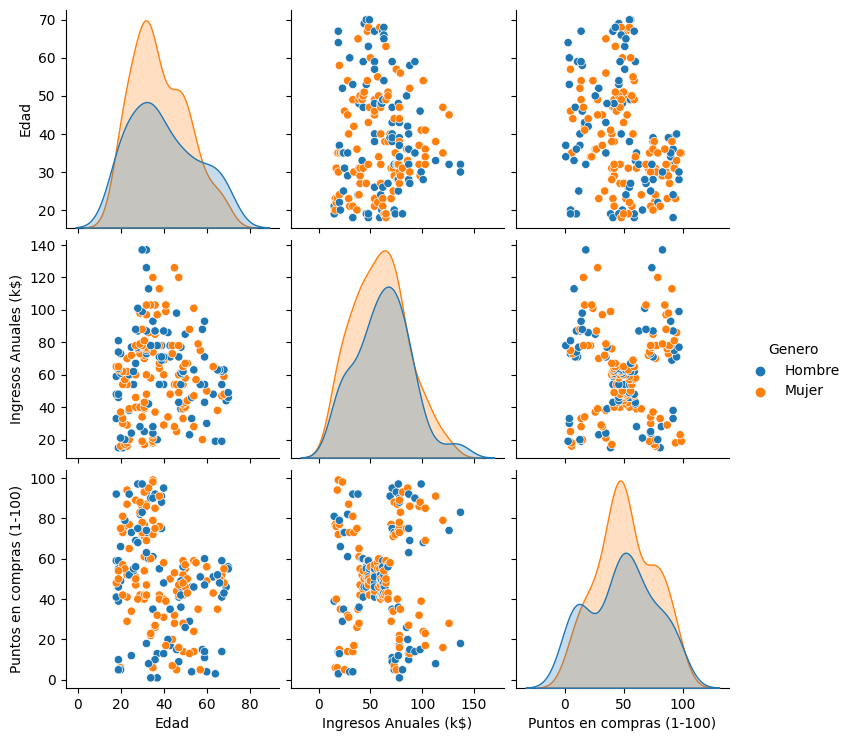

In [5]:
sns.pairplot(data = df, hue= "Genero")



---



In [10]:
x = df.loc[:,["Edad", "Ingresos Anuales (k$)", "Puntos en compras (1-100)"]]
normalizer = StandardScaler()
x_norm = normalizer.fit_transform(x)

In [12]:
df_norm = pd.DataFrame(x_norm, columns = ["Edad", "Ingresos Anuales (k$)", "Puntos en compras (1-100)"])

In [13]:
df_norm

,Edad,Ingresos Anuales (k$),Puntos en compras (1-100)
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980
...,...,...,...
195,-0.276302,2.268791,1.118061
196,0.441365,2.497807,-0.861839
197,-0.491602,2.497807,0.923953
198,-0.491602,2.917671,-1.250054


In [14]:
df_norm.describe()

,Edad,Ingresos Anuales (k$),Puntos en compras (1-100)
count,2.000000e+02,2.000000e+02,2.000000e+02
mean,-1.021405e-16,-2.131628e-16,-1.465494e-16
std,1.002509e+00,1.002509e+00,1.002509e+00
min,-1.496335e+00,-1.738999e+00,-1.910021e+00
25%,-7.248436e-01,-7.275093e-01,-5.997931e-01
50%,-2.045351e-01,3.587926e-02,-7.764312e-03
75%,7.284319e-01,6.656748e-01,8.851316e-01
max,2.235532e+00,2.917671e+00,1.894492e+00


In [36]:
def startKmeans(k):
  wcss = []
  score = []
  for k in range(2, k):
    model_k = KMeans(n_clusters = k)
    clusters = model_k.fit_predict(df_norm)
    wcss.append(model_k.inertia_)
    score.append(silhouette_score(x_norm, clusters))
  return wcss, score

In [37]:
kmax = 10
wcss, score = startKmeans(kmax)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

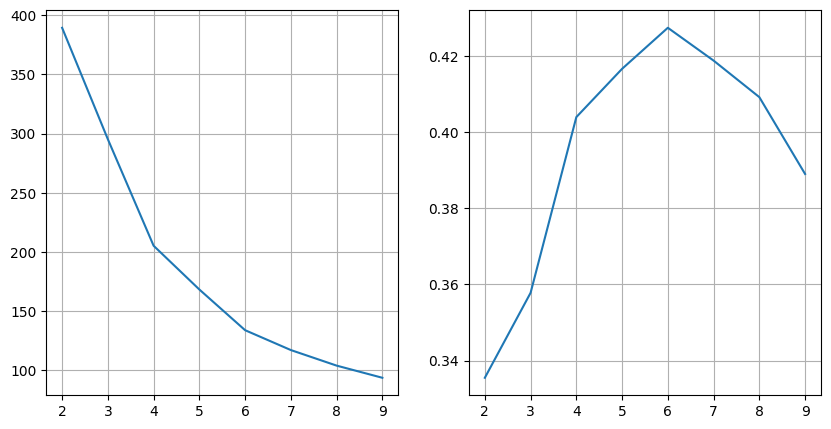

In [40]:
plt.figure(figsize = (10,5))
plt.subplot(121)
plt.plot(range(2, kmax), wcss)
plt.grid(True)
plt.subplot(122)
plt.plot(range(2, kmax), score)
plt.grid(True)

In [41]:
model_final = KMeans(n_clusters = 6)
clusters_final = model_final.fit_predict(df_norm)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [42]:
df["Cluster"] = clusters_final.astype("str")
df

,Genero,Edad,Ingresos Anuales (k$),Puntos en compras (1-100),Cluster
0,Hombre,19,15,39,5
1,Hombre,21,15,81,5
2,Mujer,20,16,6,1
3,Mujer,23,16,77,5
4,Mujer,31,17,40,1
...,...,...,...,...,...
195,Mujer,35,120,79,0
196,Mujer,45,126,28,3
197,Hombre,32,126,74,0
198,Hombre,32,137,18,3


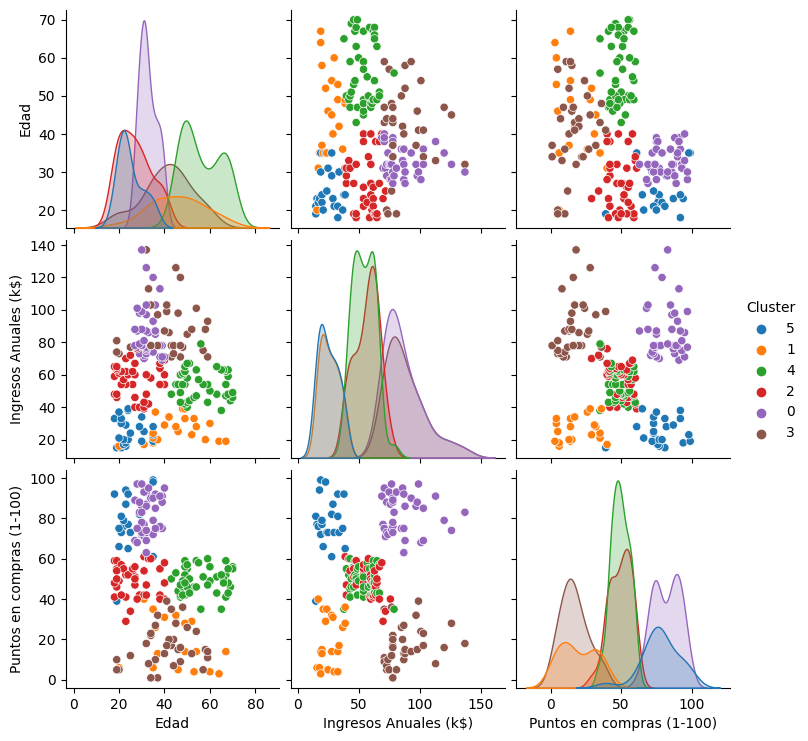

In [44]:
sns.pairplot(data = df, hue = "Cluster")